In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [247]:
df = pd.read_csv('Social_Network_Ads.csv')

In [249]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [251]:
x=df.iloc[:,2:4].values

In [253]:
x.shape

(400, 2)

In [255]:
y=df.iloc[:,-1].values

In [257]:
y.shape

(400,)

In [259]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [261]:
from sklearn.preprocessing import StandardScaler           

In [263]:
scaler = StandardScaler()

In [265]:
x_train=scaler.fit_transform(x_train)

In [267]:
x_train

array([[ 1.8925893 ,  1.52189404],
       [ 0.1250379 ,  0.03213212],
       [ 0.9106163 , -1.31157471],
       [-1.34792161, -1.48684082],
       [-0.169554  , -0.58129926],
       [-0.56234321,  2.33980255],
       [ 1.0088136 , -1.19473064],
       [-0.75873781,  1.08372877],
       [ 2.1871812 , -1.04867555],
       [ 0.0268406 , -0.25997806],
       [-0.46414591, -1.1363086 ],
       [ 0.1250379 ,  0.03213212],
       [ 1.6961947 , -0.90262046],
       [ 1.1070109 , -0.90262046],
       [ 0.5178271 ,  1.22978386],
       [-1.05332971, -1.4576298 ],
       [-1.15152701, -1.54526286],
       [-0.0713567 ,  0.67477452],
       [ 0.4196298 , -0.46445519],
       [-0.2677513 , -0.25997806],
       [-0.85693511,  0.14897619],
       [ 0.0268406 ,  0.29503128],
       [ 0.7142217 , -1.28236369],
       [ 1.5979974 ,  1.11293979],
       [ 0.812419  , -1.36999675],
       [-1.44611891, -1.22394166],
       [-0.0713567 ,  0.14897619],
       [ 0.4196298 , -0.14313399],
       [-0.2677513 ,

In [269]:
x_test=scaler.transform(x_test)

In [271]:
# method 1 for k-value

In [273]:
k=np.sqrt(x_train.shape[0])

In [275]:
k

17.320508075688775

In [277]:
k=17

In [279]:
from sklearn.neighbors import KNeighborsClassifier

In [281]:
knn =KNeighborsClassifier(n_neighbors=k)

In [283]:
# train our data

In [285]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [287]:
y_pred = knn.predict(x_test)

In [289]:
from sklearn.metrics import accuracy_score 

In [291]:
accuracy_score(y_test,y_pred)

0.94

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[59,  4],
       [ 2, 35]], dtype=int64)

In [73]:
# method 2 k-value

In [83]:
accuracy=[]

for i in range(1,26):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test)))
    

In [87]:
len(accuracy)

25

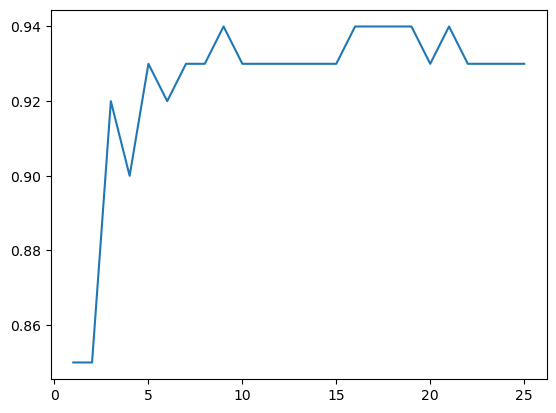

In [89]:
plt.plot(range(1,26),accuracy)

In [91]:
knn = KNeighborsClassifier(n_neighbors=11)

In [93]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [95]:
y_pred = knn.predict(x_test)

In [99]:
accuracy_score(y_test,y_pred)

0.93

In [325]:
import numpy as np

def prdict_output(scaler, knn):
    age = int(input("enter your age : "))
    salary = int(input("enter your salary : "))
    input_df = np.array([[age, salary]])  # shape (1, 2)
    
    print("your input data :", input_df)
    
    st_df = scaler.transform(input_df)  # use fitted scaler
    output = knn.predict(st_df)
    if output == 1:
        return "you can able to Purchased this product"
    else :
        return "you can not able to Purchased this product"
        
    

In [331]:
prdict_output(scaler,knn)

enter your age :  46
enter your salary :  41000


your input data : [[   46 41000]]


array([1], dtype=int64)